In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('train.csv (1).zip')

In [3]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [4]:
data.shape

(54808, 13)

In [5]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [6]:
data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [7]:
data['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [8]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [9]:
data.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


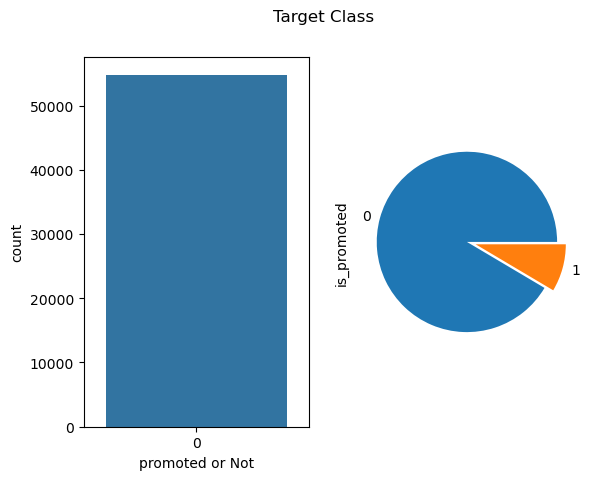

In [10]:

plt.subplot(1,2,1)
sns.countplot(data['is_promoted'])
plt.xlabel('promoted or Not')


plt.subplot(1,2,2)
data['is_promoted'].value_counts().plot(kind='pie',explode=[0,0.1],labels=['0','1'])
plt.suptitle('Target Class')
plt.show()

In [11]:
### missing values values imputation

data.isna().sum()


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
data_precent=((data.isna().sum()/data.shape[0])*100).round(2)
data_precent

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64

In [13]:
data.head()    ## education  is two tyes  so 'mode ' and  :same way previous_year_rating   1,2,3,4,5 rating  so 'mode' is use the fill the null values 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [14]:
data['education']=data['education'].fillna(data['education'].mode()[0])
data['previous_year_rating']=data['previous_year_rating'].fillna(data['previous_year_rating'].mode()[0])

In [15]:
data.isna().sum()



employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [16]:
data_precent=((data.isna().sum()/data.shape[0])*100).round(2)
data_precent

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

In [17]:
### outliers handling ---> numerical Data



data.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,0,49,0
1,65141,1,30,5.0,4,0,60,0
2,7513,1,34,3.0,7,0,50,0
3,2542,2,39,1.0,10,0,50,0
4,48945,1,45,3.0,2,0,73,0


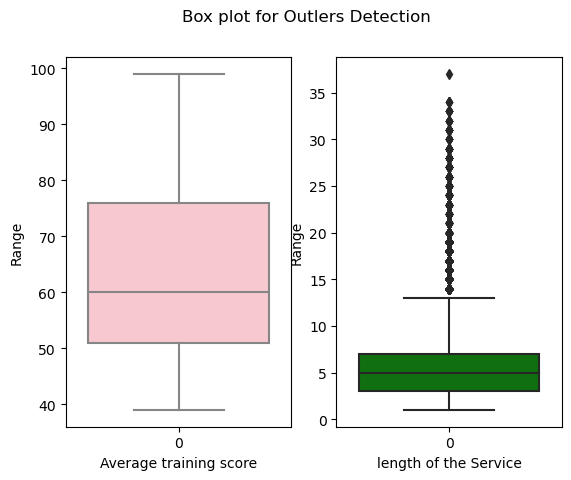

In [18]:
plt.subplot(1,2,1)
sns.boxplot(data['avg_training_score'],color='pink')
plt.xlabel('Average training score')
plt.ylabel('Range')


plt.subplot(1,2,2)
sns.boxplot(data['length_of_service'],color='green')
plt.xlabel('length of the Service')
plt.ylabel('Range')
plt.suptitle('Box plot for Outlers Detection')
plt.show()




In [19]:
#### Remove the outliers from the leangth of the serivce columns

data=data[data['length_of_service']<13]

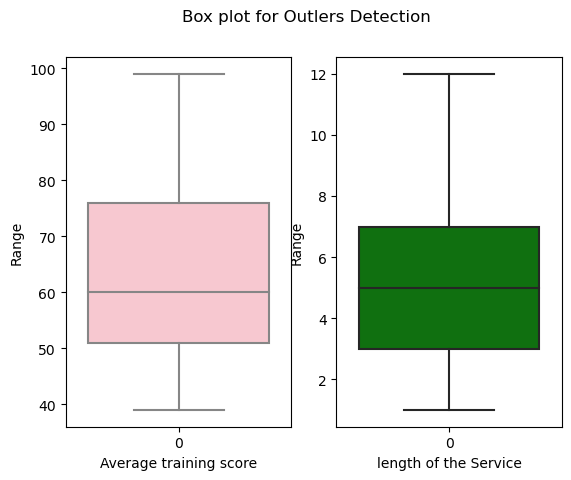

In [20]:
plt.subplot(1,2,1)
sns.boxplot(data['avg_training_score'],color='pink')
plt.xlabel('Average training score')
plt.ylabel('Range')


plt.subplot(1,2,2)
sns.boxplot(data['length_of_service'],color='green')
plt.xlabel('length of the Service')
plt.ylabel('Range')
plt.suptitle('Box plot for Outlers Detection')
plt.show()


# univariate analysis

In [21]:
data.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0


Text(0.5, 1.0, 'previous_year_rating')

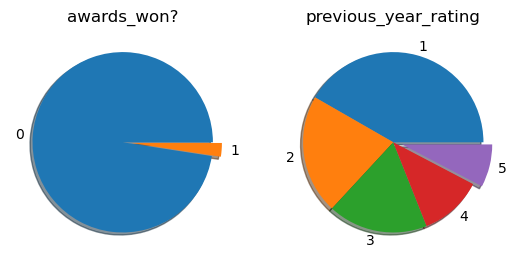

In [22]:
#awards_won?,previous_year_rating,no_of_trainings ----> pie chart

##first columns :awards_won?
plt.subplot(1,2,1)
labels=['0','1']
explode=[0,0.1]
size=data['awards_won?'].value_counts()
plt.pie(size,labels=labels,explode=explode,shadow=True)
plt.title('awards_won?')



## second columns:previous_year_rating


plt.subplot(1,2,2)
labels=['1','2','3','4','5']
explode=[0,0,0,0,0.1]
size=data['previous_year_rating'].value_counts()
plt.pie(size,labels=labels,explode=explode,shadow=True)
plt.title('previous_year_rating')




In [23]:
data['no_of_trainings'].value_counts()

1     40744
2      7556
3      1696
4       450
5       122
6        39
7        11
8         5
9         5
10        4
Name: no_of_trainings, dtype: int64

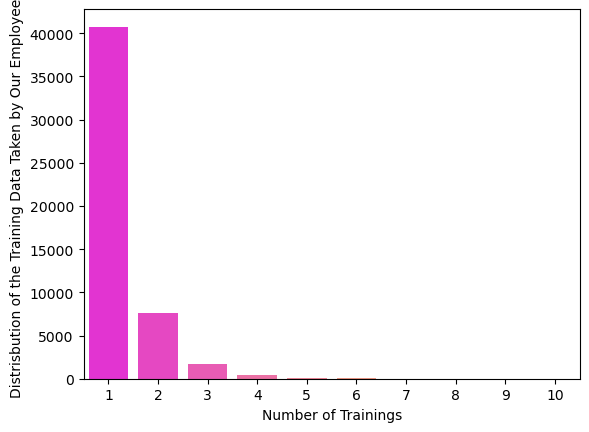

In [24]:

sns.countplot(x='no_of_trainings', data=data, palette='spring')
plt.xlabel('Number of Trainings')
plt.ylabel('Distrisbution of the Training Data Taken by Our Employees')
plt.show()


Text(0.5, 0, 'ageof the employee')

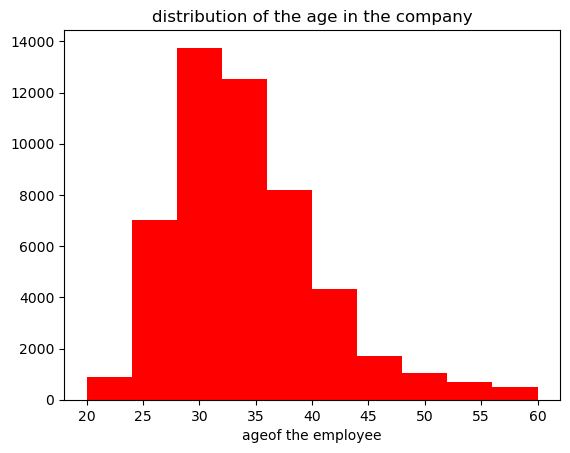

In [25]:
plt.hist(data['age'],color='red')
plt.title('distribution of the age in the company')
plt.xlabel('ageof the employee')

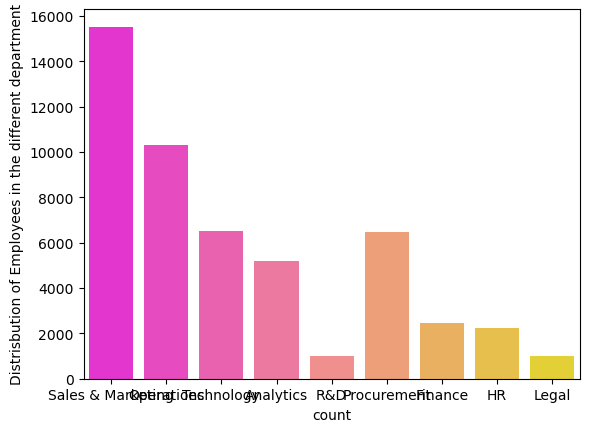

In [26]:
sns.countplot(x='department', data=data, palette='spring')
plt.xlabel('count')
plt.ylabel('Distrisbution of Employees in the different department')
plt.show()


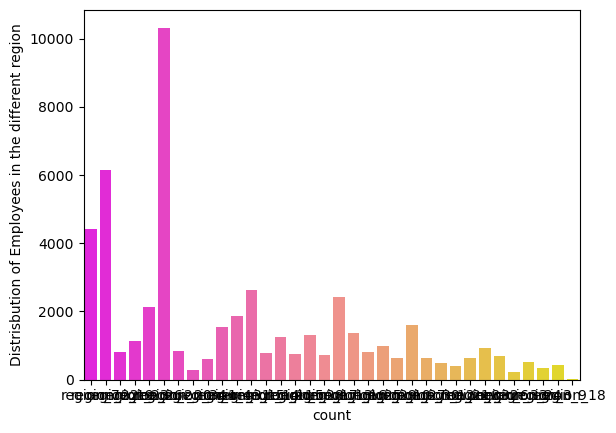

In [27]:
sns.countplot(x='region', data=data, palette='spring')
plt.xlabel('count')
plt.ylabel('Distrisbution of Employees in the different region')
plt.show()


In [28]:


data.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0


Text(0.5, 1.0, 'recruitment_channel')

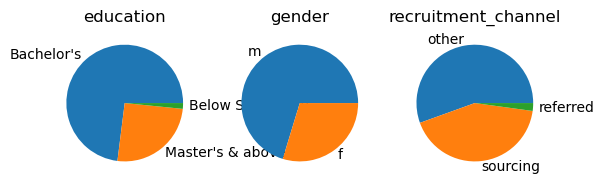

In [29]:
##education gender recruitment_channel

 
    ### education
    
    
plt.subplot(1,3,1)
labels=data['education'].value_counts().index
size=data['education'].value_counts()
explode=None

plt.pie (size,labels=labels,explode=explode)
plt.title('education')


######gender

plt.subplot(1,3,2)
labels=data['gender'].value_counts().index
size=data['gender'].value_counts()
explode=None

plt.pie (size,labels=labels,explode=explode)
plt.title('gender')



####recruitment_channel
          
          
plt.subplot(1,3,3)
labels=data['recruitment_channel'].value_counts().index
size=data['recruitment_channel'].value_counts()
explode=None

plt.pie (size,labels=labels,explode=explode)
plt.title('recruitment_channel')







In [30]:
data['recruitment_channel'].value_counts()



other       28106
sourcing    21430
referred     1096
Name: recruitment_channel, dtype: int64

# Bivariate Analysis   

## C&C
#  C&N
#  N&N

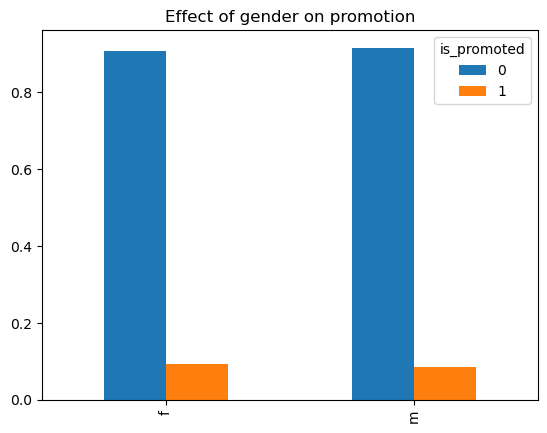

In [31]:
### gender and promption
x=pd.crosstab(data['gender'],data['is_promoted'])
x.div(x.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False)
plt.title('Effect of gender on promotion') 
plt.xlabel('')
plt.show()

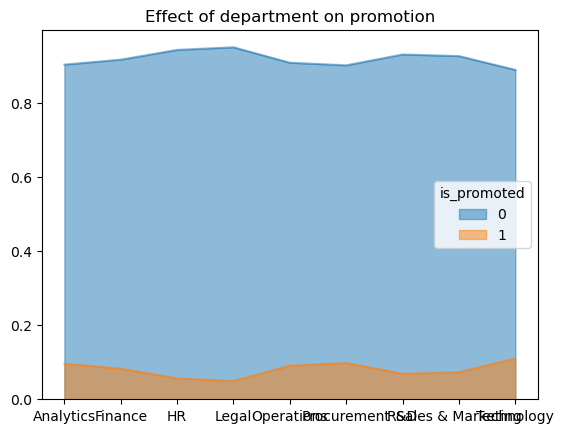

In [32]:
### department and promption
x=pd.crosstab(data['department'],data['is_promoted'])
x.div(x.sum(1).astype(float),axis=0).plot(kind='area',stacked=False)
plt.title('Effect of department on promotion') 
plt.xlabel('')
plt.show()

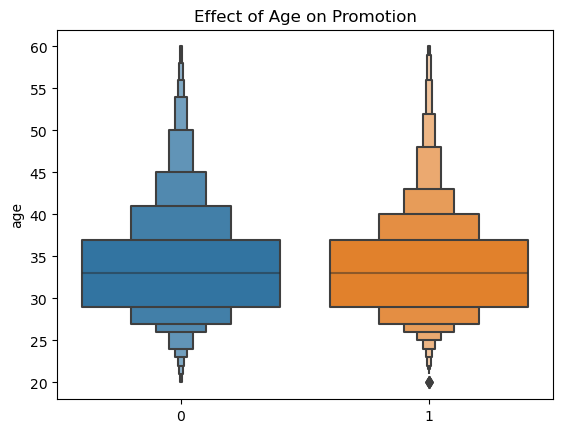

In [33]:

sns.boxenplot(x=data['is_promoted'], y=data['age'])
plt.title('Effect of Age on Promotion')
plt.xlabel('')
plt.show()


# multivariate analysis

C:\Users\srava\AppData\Local\Temp\ipykernel_12084\3005411105.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='Wistia')


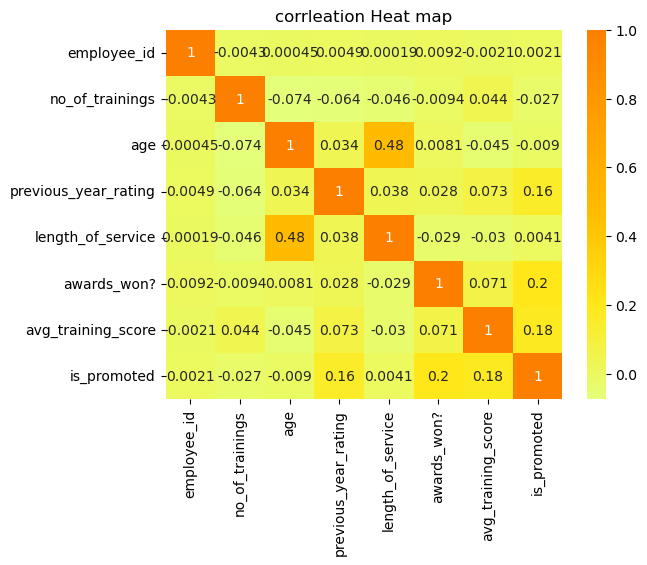

In [34]:
sns.heatmap(data.corr(),annot=True,cmap='Wistia')
plt.title("corrleation Heat map")
plt.show()

In [35]:
data.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0


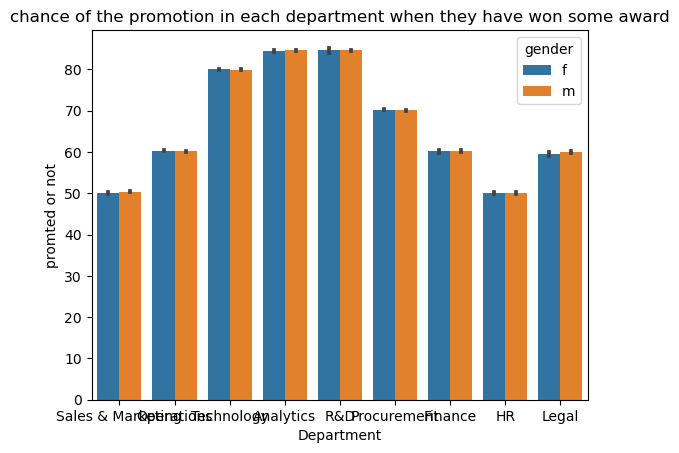

In [36]:
### Department columns and award winner
sns.barplot(y=data['avg_training_score'],x=data['department'],hue=data['gender'])
plt.title('chance of the promotion in each department when they have won some award')
plt.xlabel('Department')
plt.ylabel('promted or not')
plt.show()

# feature engineering

In [37]:
data.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0


In [38]:
#### Create a metric of sum
data['sum_metric']=data['awards_won?']+data['previous_year_rating']
  ### create a total score column
data['total_score']=data['avg_training_score']*data['no_of_trainings']

In [39]:
data.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,5.0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,5.0,60


In [40]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted',
       'sum_metric', 'total_score'],
      dtype='object')

In [41]:
### columns remove ----> unnassacry columns


data=data.drop(['employee_id','region','recruitment_channel'],axis=1)



In [42]:
print(data.columns)

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'awards_won?',
       'avg_training_score', 'is_promoted', 'sum_metric', 'total_score'],
      dtype='object')


In [43]:
### no award winner ,previous_year_rating=1,avg_training_score<60
  ###  condition apply remove some rows
data[(data['previous_year_rating']==1.0)&
     (data['awards_won?']==0)&
     (data['avg_training_score']<60)& 
           (data['is_promoted']==1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
573,Sales & Marketing,Master's & above,f,1,39,1.0,10,0,52,1,1.0,52
3451,Sales & Marketing,Bachelor's,m,1,24,1.0,3,0,50,1,1.0,50
4888,Sales & Marketing,Bachelor's,m,1,42,1.0,10,0,50,1,1.0,50
12241,Legal,Bachelor's,m,1,31,1.0,6,0,56,1,1.0,56
16807,Sales & Marketing,Bachelor's,m,1,35,1.0,10,0,57,1,1.0,57
17281,Sales & Marketing,Bachelor's,m,1,30,1.0,4,0,49,1,1.0,49
19582,Sales & Marketing,Bachelor's,m,2,27,1.0,2,0,46,1,1.0,92
21266,Sales & Marketing,Bachelor's,m,1,34,1.0,10,0,52,1,1.0,52
23209,Operations,Bachelor's,m,1,37,1.0,5,0,58,1,1.0,58
24564,Sales & Marketing,Bachelor's,m,2,30,1.0,7,0,45,1,1.0,90


In [44]:
data.shape

(50632, 12)

In [45]:
## drop the rows  with conditions
data=data.drop(data[(data['previous_year_rating']==1.0)&
     (data['awards_won?']==0)&
     (data['avg_training_score']<60)& 
           (data['is_promoted']==1)].index)

In [46]:
data.shape

(50617, 12)

In [47]:
data.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,0,49,0,5.0,49
1,Operations,Bachelor's,m,1,30,5.0,4,0,60,0,5.0,60
2,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0,50,0,3.0,50
3,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0,50,0,1.0,100
4,Technology,Bachelor's,m,1,45,3.0,2,0,73,0,3.0,73


In [48]:
data.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [49]:
data['education'].value_counts()

Bachelor's          36953
Master's & above    12859
Below Secondary       805
Name: education, dtype: int64

In [50]:
  ##education cloums C to N 
data['education']=data['education'].replace(("Bachelor's","Master's & above","Below Secondary"),
(3,2,1))

In [51]:
from sklearn.preprocessing import LabelEncoder


In [52]:
le=LabelEncoder()         ###### label encodeing the  columns  C& N


In [53]:
data['department']=le.fit_transform(data['department'])
data['gender']=le.fit_transform(data['gender'])
    

In [54]:
data.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,2,0,1,35,5.0,8,0,49,0,5.0,49
1,4,3,1,1,30,5.0,4,0,60,0,5.0,60
2,7,3,1,1,34,3.0,7,0,50,0,3.0,50
3,7,3,1,2,39,1.0,10,0,50,0,1.0,100
4,8,3,1,1,45,3.0,2,0,73,0,3.0,73


In [55]:
### splitting the code
   ##data splitting x,and y is target columns

y=data['is_promoted']
x=data.drop(['is_promoted'],axis=1)


In [56]:
x.shape

(50617, 11)

In [57]:
y.shape

(50617,)

In [59]:
#### handling Imblance data



#from imblearn.over_sampling import SMOTE
#oversample=SMOTE()
#x,y=oversample.fit_resample(x,y)

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [84]:
x_train.shape


(40493, 11)

In [85]:
x_test.shape

(10124, 11)

In [86]:
y_train.shape

(40493,)

In [87]:
y_test.shape

(10124,)

In [ ]:
### Feature scaling        ### diffrent units  data conver into same units data 

In [113]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_valid=sc.fit_transform(x_test)


In [114]:
####MOdel Building

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\srava\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [115]:
print("training Acc.:",model.score(x_train,y_train))
print("training Acc.:",model.score(x_test,y_test))


training Acc.: 0.987207665522436
training Acc.: 0.08968787040695378


C:\Users\srava\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


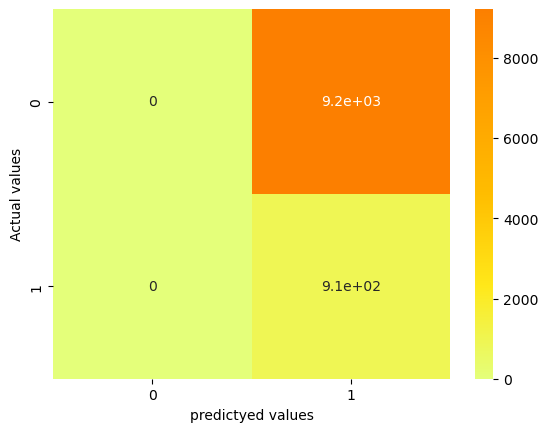

In [116]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="Wistia")
plt.xlabel("predictyed values")
plt.ylabel('Actual values')
plt.show()

In [117]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9216
           1       0.09      1.00      0.16       908

    accuracy                           0.09     10124
   macro avg       0.04      0.50      0.08     10124
weighted avg       0.01      0.09      0.01     10124



C:\Users\srava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
 data.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,2,0,1,35,5.0,8,0,49,0,5.0,49
1,4,3,1,1,30,5.0,4,0,60,0,5.0,60
2,7,3,1,1,34,3.0,7,0,50,0,3.0,50
3,7,3,1,2,39,1.0,10,0,50,0,1.0,100
4,8,3,1,1,45,3.0,2,0,73,0,3.0,73


In [126]:
prediction=model.predict(np.array([[2,2,1,1,35,3,10,1,90,5,500]]))  

In [127]:
print('whether the employee should get promoted or not',prediction)

whether the employee should get promoted or not [1]
